In [1]:
import torch
import matplotlib.pyplot as plt
from torchvision import datasets
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor
import tensorflow as tf
from scipy.ndimage import gaussian_filter
import numpy as np
from torch.autograd import Variable
from scipy.signal import fftconvolve
import torchvision
import sys
sys.path.append("/Users/priyanshusingh/Desktop/PytorchPrac/torchProject/Scripts")
from customModel import LeNet
import torch.nn as nn


In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [3]:
train_data = datasets.FashionMNIST(
    root = "/Users/priyanshusingh/Desktop/PytorchPrac/torchProject/Dataset",
    download=False,
    train = True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root = "/Users/priyanshusingh/Desktop/PytorchPrac/torchProject/Dataset",
    download=False,
    train = False,
    transform=ToTensor()
)

In [4]:
train_dataloader = DataLoader(train_data, batch_size= 100, shuffle = True)
test_dataloader = DataLoader(test_data, batch_size = 100, shuffle = True)

In [5]:
train_features, train_labels = next(iter(train_dataloader))

In [6]:
print(f'features batch shape = {train_features.size()}')
print(f'labels shape {train_labels.size()}') 

features batch shape = torch.Size([100, 1, 28, 28])
labels shape torch.Size([100])


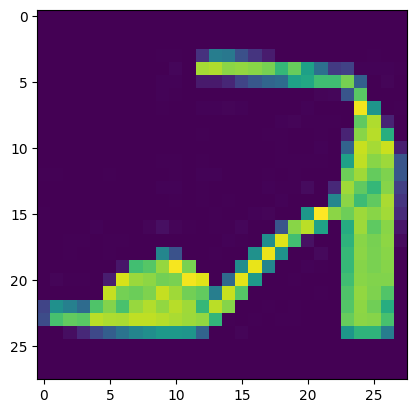

In [7]:
test_image = train_features[0].squeeze()
plt.imshow(test_image)

In [15]:
def labelMapping(label):
    output_mapping = {
                 0: "T-shirt/Top",
                 1: "Trouser",
                 2: "Pullover",
                 3: "Dress",
                 4: "Coat", 
                 5: "Sandal", 
                 6: "Shirt",
                 7: "Sneaker",
                 8: "Bag",
                 9: "Ankle Boot"
                 }
    input = (label.item() if type(label) == torch.Tensor else label)
    return output_mapping[input]

In [9]:
model = LeNet()
model.to(device)

LeNet(
  (layer1): Sequential(
    (0): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): Tanh()
    (2): AvgPool2d(kernel_size=[2, 2], stride=2, padding=0)
  )
  (layer2): Sequential(
    (0): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (1): Tanh()
    (2): AvgPool2d(kernel_size=[2, 2], stride=2, padding=0)
  )
  (layer3): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=400, out_features=128, bias=True)
    (2): Tanh()
  )
  (layer4): Sequential(
    (0): Linear(in_features=128, out_features=84, bias=True)
    (1): Tanh()
  )
  (layer5): Sequential(
    (0): Linear(in_features=84, out_features=10, bias=True)
    (1): Softmax(dim=None)
  )
)

In [10]:
error = nn.CrossEntropyLoss()
learning_rate = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
print(model)

LeNet(
  (layer1): Sequential(
    (0): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): Tanh()
    (2): AvgPool2d(kernel_size=[2, 2], stride=2, padding=0)
  )
  (layer2): Sequential(
    (0): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (1): Tanh()
    (2): AvgPool2d(kernel_size=[2, 2], stride=2, padding=0)
  )
  (layer3): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=400, out_features=128, bias=True)
    (2): Tanh()
  )
  (layer4): Sequential(
    (0): Linear(in_features=128, out_features=84, bias=True)
    (1): Tanh()
  )
  (layer5): Sequential(
    (0): Linear(in_features=84, out_features=10, bias=True)
    (1): Softmax(dim=None)
  )
)


In [11]:
epochs = 10 
count = 0
loss_list = []
iteratioms = []
accuracies = []

prediction_list = []
label_list  = [] 

for epoch in range(epochs):
    for images, labels in train_dataloader:
        images, labels = images.to(device), labels.to(device)

        train = Variable(images.view(100,1,28,28))
        labels = Variable(labels)

        outputs = model(train)
        loss = error(outputs, labels)

        optimizer.zero_grad()

        loss.backward()

        optimizer.step()

        count += 1

        if not count % 500:
            total = 0
            correct = 0

            for images, labels in test_dataloader:
                images, labels = images.to(device), labels.to(device)
                label_list.append(labels)

                test = Variable(images.view(100,1,28,28))

                output = model(test)

                predictions = torch.max(output,1)[1].to(device)
                prediction_list.append(predictions)
                correct += (predictions == labels).sum()

                total += len(labels)
            accuracy = correct *100/total
            accuracies.append(accuracy)
            iteratioms.append(count)
            loss_list.append(loss.data)

        if not (count % 500):
            print("Iteration: {}, Loss: {}, Accuracy: {}%".format(count, loss.data, accuracy))

/Users/priyanshusingh/.pyenv/versions/3.11.0/envs/torch/lib/python3.11/site-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Iteration: 500, Loss: 1.6962471008300781, Accuracy: 79.16000366210938%
Iteration: 1000, Loss: 1.628688931465149, Accuracy: 82.5999984741211%
Iteration: 1500, Loss: 1.630090594291687, Accuracy: 83.76000213623047%
Iteration: 2000, Loss: 1.6086089611053467, Accuracy: 83.94999694824219%
Iteration: 2500, Loss: 1.616580605506897, Accuracy: 84.16000366210938%
Iteration: 3000, Loss: 1.577417016029358, Accuracy: 85.11000061035156%
Iteration: 3500, Loss: 1.5772490501403809, Accuracy: 85.66999816894531%
Iteration: 4000, Loss: 1.6080482006072998, Accuracy: 86.12000274658203%
Iteration: 4500, Loss: 1.5489373207092285, Accuracy: 86.87000274658203%
Iteration: 5000, Loss: 1.6040996313095093, Accuracy: 86.08999633789062%
Iteration: 5500, Loss: 1.5956119298934937, Accuracy: 86.30000305175781%
Iteration: 6000, Loss: 1.5301672220230103, Accuracy: 87.16000366210938%


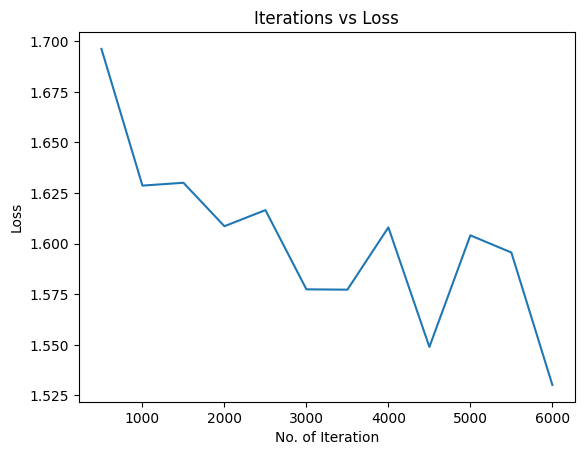

In [12]:
plt.plot(iteratioms, loss_list)
plt.xlabel("No. of Iteration")
plt.ylabel("Loss")
plt.title("Iterations vs Loss")
plt.show()

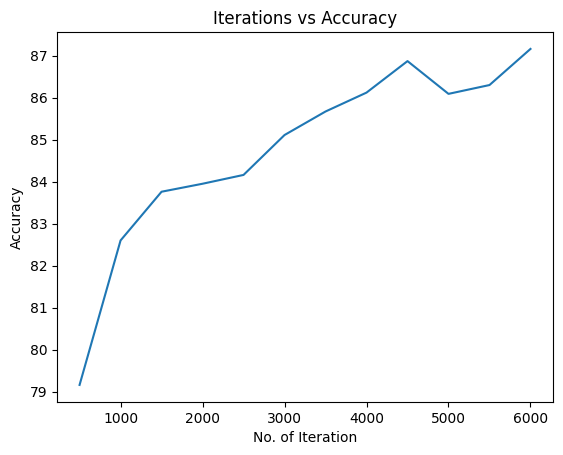

In [13]:
plt.plot(iteratioms,accuracies)
plt.xlabel("No. of Iteration")
plt.ylabel("Accuracy")
plt.title("Iterations vs Accuracy")
plt.show()

In [16]:
class_correct = [0. for _ in range(10)]
total_correct = [0. for _ in range(10)]

with torch.no_grad():
    for images, labels in test_dataloader:
        images, labels = images.to(device), labels.to(device)
        test = Variable(images)
        outputs = model(test)
        predicted = torch.max(outputs, 1)[1]
        c = (predicted == labels).squeeze()
        
        for i in range(100):
            label = labels[i]
            class_correct[label] += c[i].item()
            total_correct[label] += 1
        
for i in range(10):
    print("Accuracy of {}: {:.2f}%".format(labelMapping(i), class_correct[i] * 100 / total_correct[i]))

Accuracy of T-shirt/Top: 87.40%
Accuracy of Trouser: 96.00%
Accuracy of Pullover: 78.50%
Accuracy of Dress: 89.20%
Accuracy of Coat: 83.90%
Accuracy of Sandal: 96.10%
Accuracy of Shirt: 54.60%
Accuracy of Sneaker: 92.70%
Accuracy of Bag: 96.80%
Accuracy of Ankle Boot: 96.40%


In [19]:
train_data.train_labels[5]

tensor(2)

In [21]:
test_image = train_data.data[5]

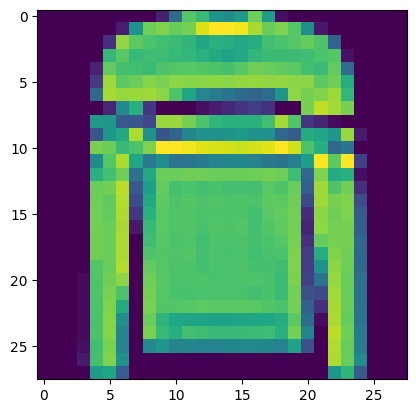

In [22]:
plt.imshow(test_image)